In [1]:
import pandas as pd 
import numpy as np

# Câu 1

In [2]:
# Khởi tạo trọng số ngẫu nhiên với phương pháp He
W = {
    "W13": np.random.randn() * np.sqrt(2 / 2),
    "W14": np.random.randn() * np.sqrt(2 / 2),
    "W23": np.random.randn() * np.sqrt(2 / 2),
    "W24": np.random.randn() * np.sqrt(2 / 2),
    "W35": np.random.randn() * np.sqrt(2 / 2),  # 2 là số nơ-ron lớp trước
    "W45": np.random.randn() * np.sqrt(2 / 2),
}

LEARNING_RATE = 0.1
EPOCHS = 100000

X = np.array([[1,1],[1,0],[0,1],[0,0]])  # input (4 mẫu, XOR dataset)
Y = np.array([[1],[0],[0],[0]])          # output mong đợi

# Normalize input data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [3]:
# Hàm kích hoạt sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Hàm kích hoạt ReLU
def relu(x):
    return np.maximum(0, x)

# Hàm kích hoạt Softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0, keepdims=True)

In [4]:
# Đạo hàm Sigmoid (dùng cho Backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

# Đạo hàm ReLU (dùng cho Backpropagation)
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Đạo hàm Softmax (dùng cho Backpropagation)    
def softmax_derivative(x):
    s = softmax(x)
    return s * (1 - s)

In [5]:
# Binary Cross-Entropy Loss
def binary_cross_entropy(y_true, y_pred):
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Mean Squared Error Loss
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

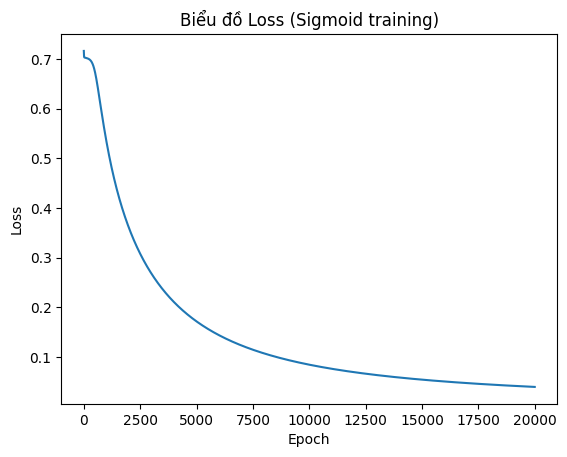

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ===== Hàm hỗ trợ =====
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(a):
    return a * (1 - a)

def binary_cross_entropy(y_true, y_pred):
    return -(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

# ===== Dữ liệu XOR =====
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[0], [1], [1], [0]])

# ===== Khởi tạo trọng số =====
np.random.seed(42)
W = {
    "W13": np.random.randn(),
    "W23": np.random.randn(),
    "W14": np.random.randn(),
    "W24": np.random.randn(),
    "W35": np.random.randn(),
    "W45": np.random.randn()
}

LEARNING_RATE = 0.1
EPOCHS = 20000
loss_history = []   # lưu loss qua từng epoch

# ===== Training loop =====
for epoch in range(EPOCHS):
    total_loss = 0
    for i in range(len(X)):
        x1, x2 = X[i]
        y = Y[i]

        # === Forward Propagation ===
        z3 = W["W13"] * x1 + W["W23"] * x2
        a3 = sigmoid(z3)

        z4 = W["W14"] * x1 + W["W24"] * x2
        a4 = sigmoid(z4)

        z5 = W["W35"] * a3 + W["W45"] * a4
        y_hat = sigmoid(z5)
        
        # Loss
        loss = binary_cross_entropy(y, y_hat)
        total_loss += loss

        # Backward Propagation
        dJ_dy_hat = y_hat - y

        dJ_dW35 = dJ_dy_hat * a3
        dJ_dW45 = dJ_dy_hat * a4

        delta3 = dJ_dy_hat * W["W35"] * sigmoid_derivative(a3)
        delta4 = dJ_dy_hat * W["W45"] * sigmoid_derivative(a4)

        dJ_dW13 = delta3 * x1
        dJ_dW23 = delta3 * x2
        dJ_dW14 = delta4 * x1
        dJ_dW24 = delta4 * x2

        # Update Weights
        W["W13"] -= LEARNING_RATE * dJ_dW13
        W["W23"] -= LEARNING_RATE * dJ_dW23
        W["W14"] -= LEARNING_RATE * dJ_dW14
        W["W24"] -= LEARNING_RATE * dJ_dW24
        W["W35"] -= LEARNING_RATE * dJ_dW35
        W["W45"] -= LEARNING_RATE * dJ_dW45

    # lưu loss trung bình mỗi epoch
    loss_history.append(total_loss / len(X))

# ===== Vẽ đồ thị Loss =====
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Biểu đồ Loss (Sigmoid training)")
plt.show()


Epoch 0, Loss: 2.9287
Epoch 2000, Loss: 1.3884
Epoch 4000, Loss: 1.3871
Epoch 6000, Loss: 1.3868
Epoch 8000, Loss: 1.3867
Epoch 10000, Loss: 1.3866
Epoch 12000, Loss: 1.3865
Epoch 14000, Loss: 1.3865
Epoch 16000, Loss: 1.3864
Epoch 18000, Loss: 1.3864

Kết quả dự đoán sau training:
Input: [1 1] -> Predict: 0.0001
Input: [1 0] -> Predict: 0.5000
Input: [0 1] -> Predict: 1.0000
Input: [0 0] -> Predict: 0.5000


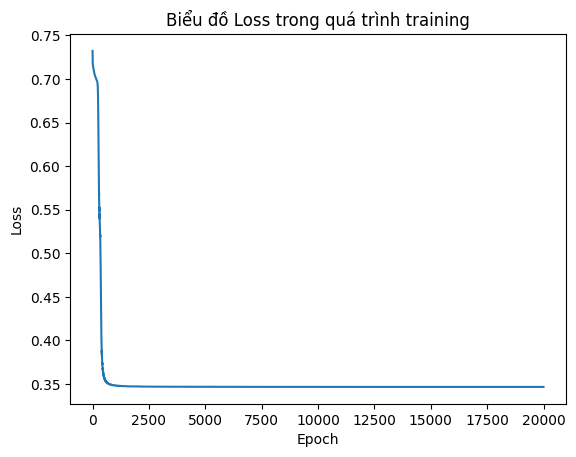

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ===== Hàm hỗ trợ =====
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)  # đạo hàm theo z

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(a):
    return a * (1 - a)  # truyền vào a = sigmoid(z)

def binary_cross_entropy(y_true, y_pred):
    return -(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

# ===== Dữ liệu XOR =====
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[0], [1], [1], [0]])

# ===== Khởi tạo trọng số =====
np.random.seed(42)
W = {
    "W13": np.random.randn(),
    "W23": np.random.randn(),
    "W14": np.random.randn(),
    "W24": np.random.randn(),
    "W35": np.random.randn(),
    "W45": np.random.randn()
}

LEARNING_RATE = 0.1
EPOCHS = 20000

loss_history = []  # lưu loss theo epoch

# ===== Training loop =====
for epoch in range(EPOCHS):
    total_loss = 0
    for i in range(len(X)):
        x1, x2 = X[i]
        y = Y[i]

        # === Forward Propagation ===
        z3 = W["W13"] * x1 + W["W23"] * x2
        a3 = relu(z3)

        z4 = W["W14"] * x1 + W["W24"] * x2
        a4 = relu(z4)

        z5 = W["W35"] * a3 + W["W45"] * a4
        y_hat = sigmoid(z5)  # output sigmoid

        # === Loss ===
        loss = binary_cross_entropy(y, y_hat)
        total_loss += loss

        # === Backward Propagation ===
        dJ_dy_hat = y_hat - y  # gradient của BCE+sigmoid

        dJ_dW35 = dJ_dy_hat * a3
        dJ_dW45 = dJ_dy_hat * a4

        # Lan ngược về hidden
        delta3 = dJ_dy_hat * W["W35"] * relu_derivative(z3)
        delta4 = dJ_dy_hat * W["W45"] * relu_derivative(z4)

        dJ_dW13 = delta3 * x1
        dJ_dW23 = delta3 * x2
        dJ_dW14 = delta4 * x1
        dJ_dW24 = delta4 * x2

        # === Update Weights ===
        W["W13"] -= LEARNING_RATE * dJ_dW13
        W["W23"] -= LEARNING_RATE * dJ_dW23
        W["W14"] -= LEARNING_RATE * dJ_dW14
        W["W24"] -= LEARNING_RATE * dJ_dW24
        W["W35"] -= LEARNING_RATE * dJ_dW35
        W["W45"] -= LEARNING_RATE * dJ_dW45

    # lưu loss trung bình mỗi epoch
    loss_history.append(total_loss / len(X))

    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss.item():.4f}")

# ===== Test kết quả =====
print("\nKết quả dự đoán sau training:")
for i in range(len(X)):
    x1, x2 = X[i]
    z3 = W["W13"] * x1 + W["W23"] * x2
    a3 = relu(z3)

    z4 = W["W14"] * x1 + W["W24"] * x2
    a4 = relu(z4)

    z5 = W["W35"] * a3 + W["W45"] * a4
    y_hat = sigmoid(z5)

    print(f"Input: {X[i]} -> Predict: {y_hat.item():.4f}")

# ===== Vẽ đồ thị Loss =====
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Biểu đồ Loss trong quá trình training")
plt.show()


In [8]:
import numpy as np

# ===== Hàm hỗ trợ =====
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(z):
    e_z = np.exp(z - np.max(z))  # tránh tràn số
    return e_z / np.sum(e_z)

# Cross-Entropy Loss
def cross_entropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-9))

# ===== Dữ liệu XOR (one-hot) =====
X_softmax = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y_softmax = np.array([
    [1, 0],  # class 0
    [0, 1],  # class 1
    [0, 1],  # class 1
    [0, 1]   # class 1
])

# ===== Khởi tạo trọng số =====
np.random.seed(42)
W = {
    "W13": np.random.randn(),   # input x1 -> hidden a3
    "W23": np.random.randn(),   # input x2 -> hidden a3
    "W14": np.random.randn(),   # input x1 -> hidden a4
    "W24": np.random.randn(),   # input x2 -> hidden a4
    "W35": np.random.randn(2),  # hidden a3 -> output (2 classes)
    "W45": np.random.randn(2)   # hidden a4 -> output (2 classes)
}

LEARNING_RATE = 0.1
EPOCHS = 20000

# ===== Training loop =====
for epoch in range(EPOCHS):
    total_loss = 0
    for i in range(len(X_softmax)):
        x1, x2 = X_softmax[i]
        y = Y_softmax[i]   # one-hot vector (2,)

        # === Forward Propagation ===
        z3 = W["W13"] * x1 + W["W23"] * x2
        a3 = sigmoid(z3)

        z4 = W["W14"] * x1 + W["W24"] * x2
        a4 = sigmoid(z4)

        z5 = W["W35"] * a3 + W["W45"] * a4   # vector (2,)
        y_hat = softmax(z5)                  # vector (2,)

        # Loss
        loss = cross_entropy(y, y_hat)
        total_loss += loss

        # === Backward Propagation ===
        dJ_dz5 = y_hat - y   # vector (2,)

        dJ_dW35 = dJ_dz5 * a3   # vector (2,)
        dJ_dW45 = dJ_dz5 * a4   # vector (2,)

        # Lan ngược về hidden
        delta3 = np.dot(dJ_dz5, W["W35"]) * sigmoid_derivative(a3)
        delta4 = np.dot(dJ_dz5, W["W45"]) * sigmoid_derivative(a4)

        dJ_dW13 = delta3 * x1
        dJ_dW23 = delta3 * x2
        dJ_dW14 = delta4 * x1
        dJ_dW24 = delta4 * x2

        # Update Weights
        W["W13"] -= LEARNING_RATE * dJ_dW13
        W["W23"] -= LEARNING_RATE * dJ_dW23
        W["W14"] -= LEARNING_RATE * dJ_dW14
        W["W24"] -= LEARNING_RATE * dJ_dW24
        W["W35"] -= LEARNING_RATE * dJ_dW35
        W["W45"] -= LEARNING_RATE * dJ_dW45

    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss:.4f}")

# ===== Test model sau huấn luyện =====
print("\nDự đoán sau training:")
for i in range(len(X_softmax)):
    x1, x2 = X_softmax[i]
    z3 = W["W13"] * x1 + W["W23"] * x2
    a3 = sigmoid(z3)

    z4 = W["W14"] * x1 + W["W24"] * x2
    a4 = sigmoid(z4)

    z5 = W["W35"] * a3 + W["W45"] * a4
    y_hat = softmax(z5)

    print(f"Input: {X_softmax[i]} -> Predict: {y_hat}")


Epoch 0, Loss: 3.3300
Epoch 2000, Loss: 0.1098
Epoch 4000, Loss: 0.0495
Epoch 6000, Loss: 0.0320
Epoch 8000, Loss: 0.0237
Epoch 10000, Loss: 0.0188
Epoch 12000, Loss: 0.0156
Epoch 14000, Loss: 0.0133
Epoch 16000, Loss: 0.0116
Epoch 18000, Loss: 0.0103

Dự đoán sau training:
Input: [1 1] -> Predict: [0.99697361 0.00302639]
Input: [1 0] -> Predict: [0.00383797 0.99616203]
Input: [0 1] -> Predict: [0.00226901 0.99773099]
Input: [0 0] -> Predict: [6.52487448e-05 9.99934751e-01]


# Bài 2: Tính toán Backpropagation

## a) Công thức cập nhật trọng số trong Backpropagation

Công thức tổng quát:

$$
W \; \leftarrow \; W - \eta \cdot \frac{\partial L}{\partial W}
$$

Trong đó:

* $W$: trọng số của mạng
* $\eta$: learning rate
* $\frac{\partial L}{\partial W}$: gradient của hàm mất mát theo trọng số

Trong code Python:

```python
# Update Weights
W13 -= LEARNING_RATE * dJ_dW13
W23 -= LEARNING_RATE * dJ_dW23
W14 -= LEARNING_RATE * dJ_dW14
W24 -= LEARNING_RATE * dJ_dW24
W35 -= LEARNING_RATE * dJ_dW35
W45 -= LEARNING_RATE * dJ_dW45
```

---

## b) Tính toán Gradient của hàm mất mát theo trọng số

Ví dụ với mạng neural XOR (2 input → 2 hidden → 1 output):

Forward propagation:

```python
z3 = W13 * x1 + W23 * x2
a3 = sigmoid(z3)

z4 = W14 * x1 + W24 * x2
a4 = sigmoid(z4)

z5 = W35 * a3 + W45 * a4
y_hat = sigmoid(z5)
```

Backward propagation (tính gradient):

```python
# Gradient tại output
dJ_dy_hat = y_hat - y

# Gradient với W35, W45 (tầng output)
dJ_dW35 = dJ_dy_hat * a3
dJ_dW45 = dJ_dy_hat * a4

# Lan ngược về hidden
delta3 = dJ_dy_hat * W35 * sigmoid_derivative(a3)
delta4 = dJ_dy_hat * W45 * sigmoid_derivative(a4)

# Gradient với W13, W23, W14, W24 (tầng hidden)
dJ_dW13 = delta3 * x1
dJ_dW23 = delta3 * x2
dJ_dW14 = delta4 * x1
dJ_dW24 = delta4 * x2
```

Như vậy ta đã tính được gradient của hàm mất mát theo từng trọng số.


## c) Xác định hướng cập nhật trọng số bằng Gradient Descent

Sau khi có gradient, ta cập nhật theo công thức:

$$
W \; \leftarrow \; W - \eta \cdot \frac{\partial L}{\partial W}
$$

Trong code:

```python
W13 -= LEARNING_RATE * dJ_dW13
W23 -= LEARNING_RATE * dJ_dW23
W14 -= LEARNING_RATE * dJ_dW14
W24 -= LEARNING_RATE * dJ_dW24
W35 -= LEARNING_RATE * dJ_dW35
W45 -= LEARNING_RATE * dJ_dW45
```


Epoch 0, Loss: 2.8649
Epoch 1000, Loss: 2.1380
Epoch 2000, Loss: 1.4392
Epoch 3000, Loss: 1.0700
Epoch 4000, Loss: 0.8405
Epoch 5000, Loss: 0.6850
Epoch 6000, Loss: 0.5736
Epoch 7000, Loss: 0.4906
Epoch 8000, Loss: 0.4268
Epoch 9000, Loss: 0.3766

Dự đoán sau training:
Input: [1 1] -> Predict: 0.1279
Input: [1 0] -> Predict: 0.9440
Input: [0 1] -> Predict: 0.9433
Input: [0 0] -> Predict: 0.0352


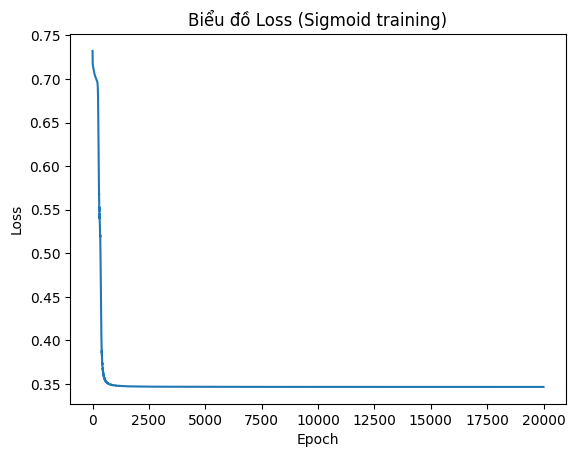

In [9]:
import numpy as np

# ===== Hàm hỗ trợ =====
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def binary_cross_entropy(y_true, y_pred):
    return -(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

# ===== Dữ liệu giả định (XOR) =====
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[0], [1], [1], [0]])

# ===== Khởi tạo trọng số =====
np.random.seed(42)
W13 = np.random.randn()
W23 = np.random.randn()
W14 = np.random.randn()
W24 = np.random.randn()
W35 = np.random.randn()
W45 = np.random.randn()

LEARNING_RATE = 0.1
EPOCHS = 10000

# ===== Training loop =====
for epoch in range(EPOCHS):
    total_loss = 0
    for i in range(len(X)):
        x1, x2 = X[i]
        y = Y[i]

        # === Forward Propagation ===
        z3 = W13 * x1 + W23 * x2
        a3 = sigmoid(z3)

        z4 = W14 * x1 + W24 * x2
        a4 = sigmoid(z4)

        z5 = W35 * a3 + W45 * a4
        y_hat = sigmoid(z5)

        # === Loss ===
        loss = binary_cross_entropy(y, y_hat)
        total_loss += loss

        # === Backward Propagation ===
        dJ_dy_hat = y_hat - y

        dJ_dW35 = dJ_dy_hat * a3
        dJ_dW45 = dJ_dy_hat * a4

        delta3 = dJ_dy_hat * W35 * sigmoid_derivative(a3)
        delta4 = dJ_dy_hat * W45 * sigmoid_derivative(a4)

        dJ_dW13 = delta3 * x1
        dJ_dW23 = delta3 * x2
        dJ_dW14 = delta4 * x1
        dJ_dW24 = delta4 * x2

        # === Update Weights ===
        W13 -= LEARNING_RATE * dJ_dW13
        W23 -= LEARNING_RATE * dJ_dW23
        W14 -= LEARNING_RATE * dJ_dW14
        W24 -= LEARNING_RATE * dJ_dW24
        W35 -= LEARNING_RATE * dJ_dW35
        W45 -= LEARNING_RATE * dJ_dW45

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss.item():.4f}")

# ===== Test sau training =====
print("\nDự đoán sau training:")
for i in range(len(X)):
    x1, x2 = X[i]
    z3 = W13 * x1 + W23 * x2
    a3 = sigmoid(z3)

    z4 = W14 * x1 + W24 * x2
    a4 = sigmoid(z4)

    z5 = W35 * a3 + W45 * a4
    y_hat = sigmoid(z5)

    print(f"Input: {X[i]} -> Predict: {y_hat.item():.4f}")
    
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Biểu đồ Loss (Sigmoid training)")
plt.show()


# Câu 3

Epoch 0, Loss: 2.8649
Epoch 1000, Loss: 2.1380
Epoch 2000, Loss: 1.4392
Epoch 3000, Loss: 1.0700
Epoch 4000, Loss: 0.8405
Epoch 5000, Loss: 0.6850
Epoch 6000, Loss: 0.5736
Epoch 7000, Loss: 0.4906
Epoch 8000, Loss: 0.4268
Epoch 9000, Loss: 0.3766

Kết quả dự đoán sau training:
Input: [1 1] -> Predict: 0.1279
Input: [1 0] -> Predict: 0.9440
Input: [0 1] -> Predict: 0.9433
Input: [0 0] -> Predict: 0.0352


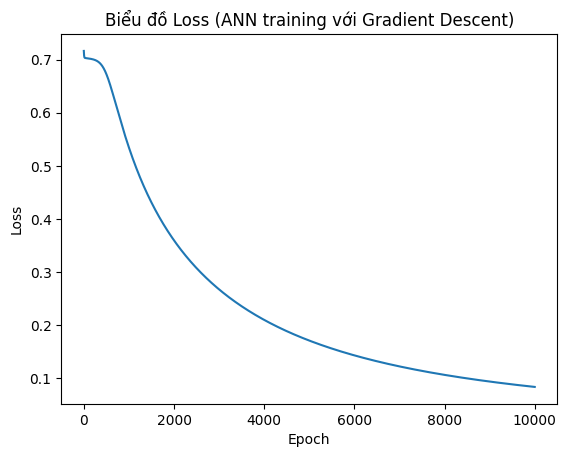

In [10]:
import numpy as np
import matplotlib.pyplot as plt


# ===== Hàm hỗ trợ =====
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(a):
    return a * (1 - a)

def binary_cross_entropy(y_true, y_pred):
    return -(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

# ===== Dữ liệu giả định (XOR) =====
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[0], [1], [1], [0]])

# ===== Khởi tạo trọng số =====
np.random.seed(42)
W = {
    "W13": np.random.randn(),
    "W23": np.random.randn(),
    "W14": np.random.randn(),
    "W24": np.random.randn(),
    "W35": np.random.randn(),
    "W45": np.random.randn()
}

LEARNING_RATE = 0.1
EPOCHS = 10000

# a) Cài đặt thuật toán Forward Propagation bằng Python
def forward(x1, x2, W):
    z3 = W["W13"] * x1 + W["W23"] * x2
    a3 = sigmoid(z3)

    z4 = W["W14"] * x1 + W["W24"] * x2
    a4 = sigmoid(z4)

    z5 = W["W35"] * a3 + W["W45"] * a4
    y_hat = sigmoid(z5)

    return a3, a4, y_hat

# b) Viết thuật toán Backpropagation để cập nhật trọng số bằng Gradient Descent
def backward(x1, x2, y, a3, a4, y_hat, W):
    # Gradient tại output
    dJ_dy_hat = y_hat - y

    # Gradient với W35, W45 (output layer)
    dJ_dW35 = dJ_dy_hat * a3
    dJ_dW45 = dJ_dy_hat * a4

    # Lan ngược về hidden
    delta3 = dJ_dy_hat * W["W35"] * sigmoid_derivative(a3)
    delta4 = dJ_dy_hat * W["W45"] * sigmoid_derivative(a4)

    dJ_dW13 = delta3 * x1
    dJ_dW23 = delta3 * x2
    dJ_dW14 = delta4 * x1
    dJ_dW24 = delta4 * x2

    # === Update Weights ===
    W["W13"] -= LEARNING_RATE * dJ_dW13
    W["W23"] -= LEARNING_RATE * dJ_dW23
    W["W14"] -= LEARNING_RATE * dJ_dW14
    W["W24"] -= LEARNING_RATE * dJ_dW24
    W["W35"] -= LEARNING_RATE * dJ_dW35
    W["W45"] -= LEARNING_RATE * dJ_dW45

    return W


# c) Chạy mô hình với tập dữ liệu giả định và kiểm tra độ hội tụ của mô hình
loss_history = []

for epoch in range(EPOCHS):
    total_loss = 0
    for i in range(len(X)):
        x1, x2 = X[i]
        y = Y[i]

        # Forward
        a3, a4, y_hat = forward(x1, x2, W)

        # Loss
        loss = binary_cross_entropy(y, y_hat)
        total_loss += loss

        # Backward + update
        W = backward(x1, x2, y, a3, a4, y_hat, W)

    loss_history.append(total_loss / len(X))

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss.item():.4f}")


print("\nKết quả dự đoán sau training:")
for i in range(len(X)):
    x1, x2 = X[i]
    _, _, y_hat = forward(x1, x2, W)
    print(f"Input: {X[i]} -> Predict: {y_hat.item():.4f}")




plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Biểu đồ Loss (ANN training với Gradient Descent)")
plt.show()




# Bài 4: Tối ưu hóa bằng kỹ thuật Regularization

## a) Áp dụng L1/L2 Regularization để giảm overfitting

* **Ý tưởng**: Thêm một thành phần phạt (penalty) vào hàm mất mát, để hạn chế giá trị trọng số quá lớn → mô hình bớt phức tạp, giảm overfitting.
* **L1 (Lasso)**: penalty = λ \* Σ|w|
* **L2 (Ridge)**: penalty = λ \* Σw²

Ví dụ trong code, thêm vào Loss:

```python
def binary_cross_entropy_with_L2(y_true, y_pred, W, lam=0.01):
    ce = -(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))
    # L2 penalty
    l2_penalty = lam * sum([np.sum(w**2) for w in W.values()])
    return ce + l2_penalty
```

Khi update gradient:

```python
# Update Weights với L2
for key in W:
    W[key] -= LEARNING_RATE * (grad[key] + lam * W[key])  # thêm regularization term
```

---

## b) Sử dụng Dropout để ngăn chặn hiện tượng phụ thuộc quá mức vào một số nơ-ron

* **Ý tưởng**: Trong quá trình huấn luyện, “tắt ngẫu nhiên” một số nơ-ron ở hidden layer (ví dụ 50%) để tránh phụ thuộc quá mức vào một số đường kết nối.
* Dropout chỉ dùng khi training, khi test thì sử dụng đầy đủ và scale output theo tỉ lệ dropout.

Ví dụ:

```python
def apply_dropout(a, dropout_rate=0.5):
    mask = (np.random.rand(*a.shape) > dropout_rate).astype(float)
    return a * mask / (1 - dropout_rate), mask
```

Trong training loop:

```python
a3, mask3 = apply_dropout(sigmoid(z3), 0.5)
a4, mask4 = apply_dropout(sigmoid(z4), 0.5)
```

---

## c) Kết hợp Batch Normalization để tăng tốc độ hội tụ

* **Ý tưởng**: Chuẩn hóa giá trị **z** tại từng layer (trước khi kích hoạt) để có phân phối chuẩn (mean=0, var=1).
* Giúp huấn luyện nhanh hơn, ổn định hơn, giảm hiện tượng gradient biến mất/nổ.

Ví dụ BatchNorm 1D:

```python
def batch_norm(z, gamma=1, beta=0, eps=1e-8):
    mu = np.mean(z)
    var = np.var(z)
    z_norm = (z - mu) / np.sqrt(var + eps)
    return gamma * z_norm + beta
```

Trong Forward Propagation:

```python
z3 = batch_norm(W["W13"] * x1 + W["W23"] * x2)
a3 = sigmoid(z3)

z4 = batch_norm(W["W14"] * x1 + W["W24"] * x2)
a4 = sigmoid(z4)
```

Epoch 0, Loss: 3.0624
Epoch 2000, Loss: 2.8582
Epoch 4000, Loss: 2.8510
Epoch 6000, Loss: 2.8489
Epoch 8000, Loss: 2.8266


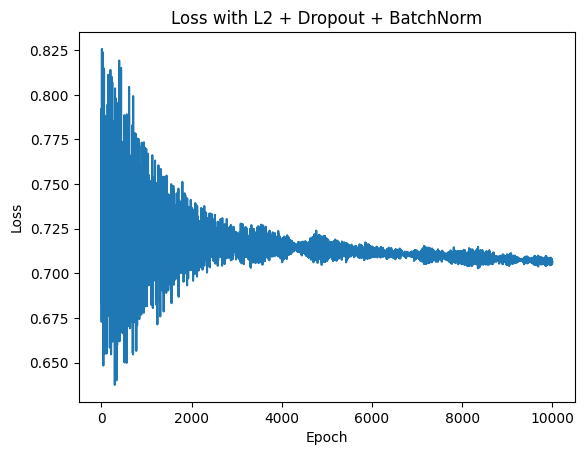


Kết quả dự đoán sau training:
Input: [1 1] -> Predict: 0.5017
Input: [1 0] -> Predict: 0.5017
Input: [0 1] -> Predict: 0.5017
Input: [0 0] -> Predict: 0.5017


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# ===== Hàm hỗ trợ =====
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(a):
    return a * (1 - a)

def binary_cross_entropy(y_true, y_pred):
    return -(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

# Batch Normalization
def batch_norm(z, gamma=1, beta=0, eps=1e-8):
    mu = np.mean(z)
    var = np.var(z)
    z_norm = (z - mu) / np.sqrt(var + eps)
    return gamma * z_norm + beta

# Dropout
def apply_dropout(a, dropout_rate=0.5):
    mask = (np.random.rand(*a.shape) > dropout_rate).astype(float)
    return a * mask / (1 - dropout_rate), mask

# ===== Dữ liệu XOR =====
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[0], [1], [1], [0]])

# ===== Khởi tạo trọng số =====
np.random.seed(42)
W = {
    "W13": np.random.randn(),
    "W23": np.random.randn(),
    "W14": np.random.randn(),
    "W24": np.random.randn(),
    "W35": np.random.randn(),
    "W45": np.random.randn()
}

LEARNING_RATE = 0.001
EPOCHS = 10000
lam = 0.01   # hệ số L2 regularization
loss_history = []

# ===== Training loop =====
for epoch in range(EPOCHS):
    total_loss = 0
    for i in range(len(X)):
        x1, x2 = X[i]
        y = Y[i]

        # === Forward Propagation ===
        z3 = batch_norm(W["W13"] * x1 + W["W23"] * x2)
        a3 = sigmoid(z3)

        z4 = batch_norm(W["W14"] * x1 + W["W24"] * x2)
        a4 = sigmoid(z4)

        # Áp dụng Dropout cho hidden layer
        a3, m3 = apply_dropout(np.array([a3]), 0.5)
        a4, m4 = apply_dropout(np.array([a4]), 0.5)

        z5 = W["W35"] * a3 + W["W45"] * a4
        y_hat = sigmoid(z5)

        # === Loss (BCE + L2 Regularization) ===
        loss = binary_cross_entropy(y, y_hat)
        l2_penalty = lam * sum([w**2 for w in W.values()])
        total_loss += loss + l2_penalty

        # === Backward Propagation ===
        dJ_dy_hat = y_hat - y

        dJ_dW35 = dJ_dy_hat * a3
        dJ_dW45 = dJ_dy_hat * a4

        delta3 = dJ_dy_hat * W["W35"] * sigmoid_derivative(a3) * m3
        delta4 = dJ_dy_hat * W["W45"] * sigmoid_derivative(a4) * m4

        dJ_dW13 = delta3 * x1
        dJ_dW23 = delta3 * x2
        dJ_dW14 = delta4 * x1
        dJ_dW24 = delta4 * x2

        # === Update Weights (có L2 regularization) ===
        W["W13"] -= LEARNING_RATE * (dJ_dW13.squeeze() + lam * W["W13"])
        W["W23"] -= LEARNING_RATE * (dJ_dW23.squeeze() + lam * W["W23"])
        W["W14"] -= LEARNING_RATE * (dJ_dW14.squeeze() + lam * W["W14"])
        W["W24"] -= LEARNING_RATE * (dJ_dW24.squeeze() + lam * W["W24"])
        W["W35"] -= LEARNING_RATE * (dJ_dW35.squeeze() + lam * W["W35"])
        W["W45"] -= LEARNING_RATE * (dJ_dW45.squeeze() + lam * W["W45"])

    # lưu loss
    loss_history.append(total_loss / len(X))

    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss.item():.4f}")

# ===== Vẽ Loss =====
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss with L2 + Dropout + BatchNorm")
plt.show()

# ===== Test kết quả =====
print("\nKết quả dự đoán sau training:")
for i in range(len(X)):
    x1, x2 = X[i]
    z3 = batch_norm(W["W13"] * x1 + W["W23"] * x2)
    a3 = sigmoid(z3)

    z4 = batch_norm(W["W14"] * x1 + W["W24"] * x2)
    a4 = sigmoid(z4)

    z5 = W["W35"] * a3 + W["W45"] * a4
    y_hat = sigmoid(z5)

    print(f"Input: {X[i]} -> Predict: {y_hat.item():.4f}")


Epoch 0, Loss: 2.8773
Epoch 2000, Loss: 2.3595
Epoch 4000, Loss: 2.4868
Epoch 6000, Loss: 2.5464
Epoch 8000, Loss: 2.5633


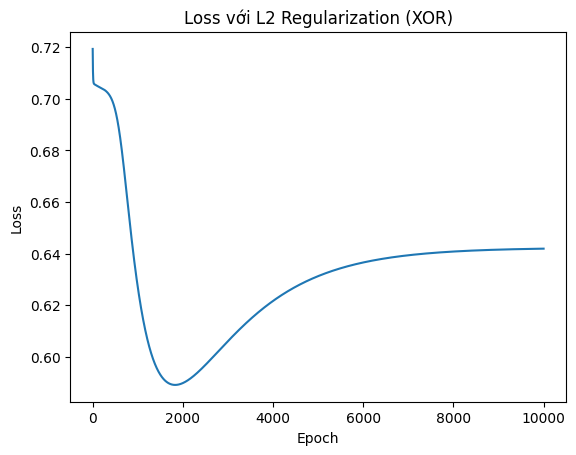


Dự đoán sau training:
Input: [1 1] -> Predict: 0.3912
Input: [1 0] -> Predict: 0.7781
Input: [0 1] -> Predict: 0.7687
Input: [0 0] -> Predict: 0.2086


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(a):
    return a * (1 - a)

def binary_cross_entropy(y_true, y_pred):
    return -(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

# Data XOR
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[0], [1], [1], [0]])

# Weights
np.random.seed(42)
W = {
    "W13": np.random.randn(),
    "W23": np.random.randn(),
    "W14": np.random.randn(),
    "W24": np.random.randn(),
    "W35": np.random.randn(),
    "W45": np.random.randn()
}

LEARNING_RATE = 0.1
EPOCHS = 10000
lam = 0.001
loss_history = []

for epoch in range(EPOCHS):
    total_loss = 0
    for i in range(len(X)):
        x1, x2 = X[i]
        y = Y[i]

        # Forward
        z3 = W["W13"] * x1 + W["W23"] * x2
        a3 = sigmoid(z3)

        z4 = W["W14"] * x1 + W["W24"] * x2
        a4 = sigmoid(z4)

        z5 = W["W35"] * a3 + W["W45"] * a4
        y_hat = sigmoid(z5)

        # Loss + L2
        loss = binary_cross_entropy(y, y_hat)
        l2_penalty = lam * sum([w**2 for w in W.values()])
        total_loss += loss + l2_penalty

        # Backprop
        dJ_dy_hat = y_hat - y
        dJ_dW35 = dJ_dy_hat * a3
        dJ_dW45 = dJ_dy_hat * a4

        delta3 = dJ_dy_hat * W["W35"] * sigmoid_derivative(a3)
        delta4 = dJ_dy_hat * W["W45"] * sigmoid_derivative(a4)

        dJ_dW13 = delta3 * x1
        dJ_dW23 = delta3 * x2
        dJ_dW14 = delta4 * x1
        dJ_dW24 = delta4 * x2

        # Update
        W["W13"] -= LEARNING_RATE * (dJ_dW13 + lam * W["W13"])
        W["W23"] -= LEARNING_RATE * (dJ_dW23 + lam * W["W23"])
        W["W14"] -= LEARNING_RATE * (dJ_dW14 + lam * W["W14"])
        W["W24"] -= LEARNING_RATE * (dJ_dW24 + lam * W["W24"])
        W["W35"] -= LEARNING_RATE * (dJ_dW35 + lam * W["W35"])
        W["W45"] -= LEARNING_RATE * (dJ_dW45 + lam * W["W45"])

    loss_history.append(total_loss / len(X))

    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss.item():.4f}")

# Vẽ loss
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss với L2 Regularization (XOR)")
plt.show()

# Test
print("\nDự đoán sau training:")
for i in range(len(X)):
    x1, x2 = X[i]
    z3 = W["W13"] * x1 + W["W23"] * x2
    a3 = sigmoid(z3)
    z4 = W["W14"] * x1 + W["W24"] * x2
    a4 = sigmoid(z4)
    z5 = W["W35"] * a3 + W["W45"] * a4
    y_hat = sigmoid(z5)
    print(f"Input: {X[i]} -> Predict: {y_hat.item():.4f}")


In [13]:
# Bài 5. Huấn luyện mô hình với TensorFlow và PyTorch
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Dữ liệu XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Xây dựng mô hình ANN với Keras
model = Sequential([
    Dense(4, input_dim=2, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile mô hình
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Huấn luyện
history = model.fit(X, y, epochs=2000, verbose=0)

# Đánh giá
loss, acc = model.evaluate(X, y, verbose=0)
print(f"Keras -> Loss: {loss:.4f}, Accuracy: {acc:.4f}")

# Dự đoán
print("Predictions (Keras):")
print(model.predict(X))


c:\Users\thong\workplace\IUH\4RD_YEAR_COLLEGE\semester_1\deep learnning\.venv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Keras -> Loss: 0.0855, Accuracy: 1.0000
Predictions (Keras):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.11183441]
 [0.9763853 ]
 [0.9221633 ]
 [0.11188042]]


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

# Dữ liệu XOR
X_torch = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
y_torch = torch.tensor([[0],[1],[1],[0]], dtype=torch.float32)

# Định nghĩa mô hình
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.hidden = nn.Linear(2, 4)
        self.output = nn.Linear(4, 1)
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x

model = ANN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Huấn luyện
for epoch in range(2000):
    y_pred = model(X_torch)
    loss = criterion(y_pred, y_torch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Đánh giá
with torch.no_grad():
    y_pred = model(X_torch)
    acc = ((y_pred > 0.5).float() == y_torch).float().mean()
    print(f"PyTorch -> Loss: {loss.item():.4f}, Accuracy: {acc.item():.4f}")
    print("Predictions (PyTorch):")
    print(y_pred.numpy())


PyTorch -> Loss: 0.0006, Accuracy: 1.0000
Predictions (PyTorch):
[[5.7412696e-04]
 [9.9943608e-01]
 [9.9943572e-01]
 [5.5303262e-04]]


# Bài 6

## Bài 6.1: Xây dựng và huấn luyện ANN trên MNIST

In [15]:
# a) Thiết kế mô hình ANN với 2 lớp ẩn, dùng ReLU và Softmax

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Chuẩn hóa dữ liệu
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Xây dựng mô hình ANN
model = Sequential([
    Dense(256, activation="relu", input_shape=(784,)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=1)

# Đánh giá
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/10


c:\Users\thong\workplace\IUH\4RD_YEAR_COLLEGE\semester_1\deep learnning\.venv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9119 - loss: 0.3085 - val_accuracy: 0.9566 - val_loss: 0.1515
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9651 - loss: 0.1174 - val_accuracy: 0.9659 - val_loss: 0.1077
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9770 - loss: 0.0774 - val_accuracy: 0.9730 - val_loss: 0.0906
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9840 - loss: 0.0559 - val_accuracy: 0.9740 - val_loss: 0.0863
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9870 - loss: 0.0415 - val_accuracy: 0.9756 - val_loss: 0.0871
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9905 - loss: 0.0298 - val_accuracy: 0.9744 - val_loss: 0.0906
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9930 - loss: 0.0229 - val_accuracy: 0.9759 - val_loss: 0.0884
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9949 - loss: 0.0178 - val_accuracy: 0.9734 - val_

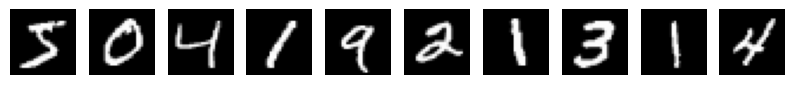

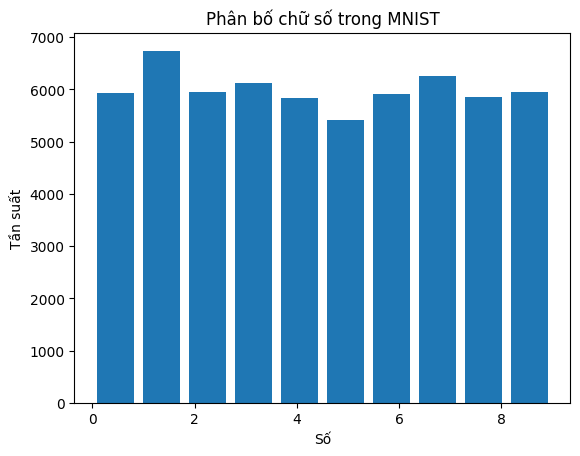

In [16]:
# c) Hiển thị 10 ảnh MNIST và biểu đồ phân bố chữ số
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap="gray")
    plt.axis("off")
plt.show()

# Biểu đồ phân bố chữ số
plt.hist(np.argmax(y_train, axis=1), bins=10, rwidth=0.8)
plt.title("Phân bố chữ số trong MNIST")
plt.xlabel("Số")
plt.ylabel("Tần suất")
plt.show()


## Bài 6.2: Tối ưu hóa mô hình

In [17]:
model_1 = Sequential([
    Dense(128, activation="relu", input_shape=(784,)),
    Dense(10, activation="softmax")
])

model_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model_1.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=1)

# Đánh giá
test_loss, test_acc = model_1.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8908 - loss: 0.4001 - val_accuracy: 0.9425 - val_loss: 0.2116
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9459 - loss: 0.1880 - val_accuracy: 0.9545 - val_loss: 0.1613
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9601 - loss: 0.1363 - val_accuracy: 0.9601 - val_loss: 0.1386
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9684 - loss: 0.1081 - val_accuracy: 0.9668 - val_loss: 0.1151
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9755 - loss: 0.0865 - val_accuracy: 0.9682 - val_loss: 0.1109
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9795 - loss: 0.0730 - val_accuracy: 0.9703 - val_loss: 0.1030
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9834 - loss: 0.0612 - val_accuracy: 0.9702 - val_loss: 0.0984
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9860 - loss: 0.0518 - val_accuracy: 0.

In [18]:
model_3 = Sequential([
    Dense(512, activation="relu", input_shape=(784,)),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

model_3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model_3.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=1)

# Đánh giá
test_loss, test_acc = model_3.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9256 - loss: 0.2529 - val_accuracy: 0.9570 - val_loss: 0.1352
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9724 - loss: 0.0930 - val_accuracy: 0.9726 - val_loss: 0.0906
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9812 - loss: 0.0595 - val_accuracy: 0.9726 - val_loss: 0.0928
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9849 - loss: 0.0449 - val_accuracy: 0.9774 - val_loss: 0.0775
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9904 - loss: 0.0302 - val_accuracy: 0.9747 - val_loss: 0.1025
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9915 - loss: 0.0250 - val_accuracy: 0.9715 - val_loss: 0.0989
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9922 - loss: 0.0234 - val_accuracy: 0.9717 - val_loss: 0.1124
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9929 - loss: 0.0219 - val_accuracy: 0.

In [19]:
from tensorflow.keras.optimizers import Adam

for lr in [0.01, 0.001, 0.0001]:
    model = Sequential([
        Dense(256, activation="relu", input_shape=(784,)),
        Dense(128, activation="relu"),
        Dense(10, activation="softmax")
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss="categorical_crossentropy", metrics=["accuracy"])
    model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=0)
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"LR={lr} -> Accuracy={acc:.4f}")


LR=0.01 -> Accuracy=0.9656
LR=0.001 -> Accuracy=0.9766
LR=0.0001 -> Accuracy=0.9627


## Bài 6.3: Giảm Overfitting & Early Stopping

In [20]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(256, activation="relu", input_shape=(784,), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=1)

# Đánh giá
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8329 - loss: 0.9462 - val_accuracy: 0.9447 - val_loss: 0.5335
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9183 - loss: 0.5691 - val_accuracy: 0.9599 - val_loss: 0.3978
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9337 - loss: 0.4494 - val_accuracy: 0.9646 - val_loss: 0.3276
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9419 - loss: 0.3827 - val_accuracy: 0.9680 - val_loss: 0.2840
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9436 - loss: 0.3479 - val_accuracy: 0.9641 - val_loss: 0.2759
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9477 - loss: 0.3218 - val_accuracy: 0.9650 - val_loss: 0.2552
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9489 - loss: 0.3035 - val_accuracy: 0.9668 - val_loss: 0.2481
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9501 - loss: 0.2966 - val_accuracy: 0.

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, validation_split=0.2,
                    epochs=50, batch_size=128, callbacks=[early_stop], verbose=1)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9539 - loss: 0.2761 - val_accuracy: 0.9713 - val_loss: 0.2198
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9545 - loss: 0.2753 - val_accuracy: 0.9709 - val_loss: 0.2203
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9546 - loss: 0.2720 - val_accuracy: 0.9728 - val_loss: 0.2131
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9544 - loss: 0.2703 - val_accuracy: 0.9717 - val_loss: 0.2154
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9553 - loss: 0.2670 - val_accuracy: 0.9726 - val_loss: 0.2108
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9549 - loss: 0.2651 - val_accuracy: 0.9735 - val_loss: 0.2050
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9559 - loss: 0.2626 - val_accuracy: 0.9709 - val_loss: 0.2104
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9526 - loss: 0.2682 - val_accuracy: 0.